In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import shapiro

Data source: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [4]:
data = pd.read_csv("country_vaccinations.csv")

What is the average vaccinations per country?

In [32]:
countrytotal= data.groupby(["country"])["total_vaccinations"].max()
number1 = (countrytotal.sum())/(countrytotal.count())
print(round(number1))

1653452


# 

What is the average people fully vaccinated per country?

In [70]:
countryfully= data.groupby(["country"])["people_fully_vaccinated"].max()
countryfully=countryfully.dropna()
number2 = (countryfully.sum()) / (countryfully.count())
print(round(number2))


289807


# 

Which combination of vaccines was used the most?

In [34]:
countryVaccinescombo = data.drop_duplicates(["country"])
print(countryVaccinescombo["vaccines"].value_counts())

Pfizer/BioNTech                          37
Moderna, Pfizer/BioNTech                 14
Oxford/AstraZeneca                        6
Oxford/AstraZeneca, Pfizer/BioNTech       5
Sputnik V                                 4
Oxford/AstraZeneca, Sinopharm             2
Sinovac                                   2
Pfizer/BioNTech, Sinopharm                2
Pfizer/BioNTech, Sinovac                  2
Oxford/AstraZeneca, Sinovac               1
CNBG, Sinovac                             1
Sinopharm                                 1
Pfizer/BioNTech, Sinopharm, Sputnik V     1
Covaxin, Oxford/AstraZeneca               1
Name: vaccines, dtype: int64


Pfizer/BioNTech 

# 

Bar Chart of Vaccines Combo

<BarContainer object of 14 artists>

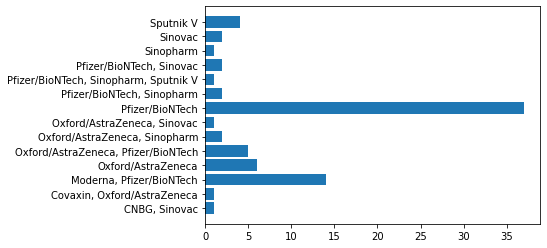

In [36]:
bardata= countryVaccinescombo.groupby(["vaccines"])["vaccines"].count()
plt.barh(bardata.index,bardata)

# 

Daily Vaccination rate in the US

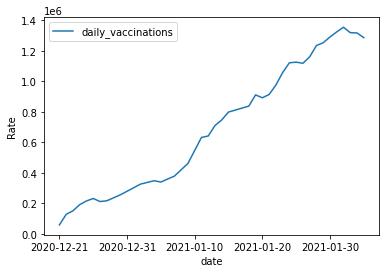

In [79]:
unitedStates = data[data["country"].str.contains("United States")]
unitedStates.sort_values("date")
unitedStates = unitedStates.dropna(subset=["daily_vaccinations"])
rate = unitedStates.plot.line(x="date", y="daily_vaccinations")
rate= rate.set_ylabel("Rate")

# 

Max Daily Vaccinations VS Max People Fully Vaccinated in each country (Without Outliers)

With Outlier

Text(0.5, 0, 'Daily Vaccinations')

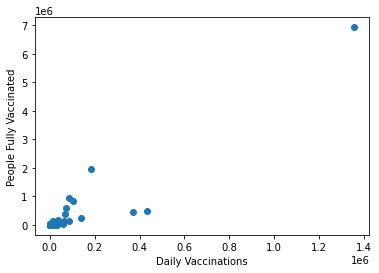

In [8]:
comparison = data.dropna(subset=["daily_vaccinations","people_fully_vaccinated"])
maxDaily= comparison.groupby(["country"])["daily_vaccinations"].max()
maxVaccinated= comparison.groupby(["country"])["people_fully_vaccinated"].max()
maxComparison = pd.concat([maxDaily, maxVaccinated],axis=1)
plt.scatter(maxComparison["daily_vaccinations"],maxComparison["people_fully_vaccinated"])
plt.ylabel("People Fully Vaccinated")
plt.xlabel("Daily Vaccinations")

Without Outlier

Text(0.5, 0, 'Daily Vaccinations')

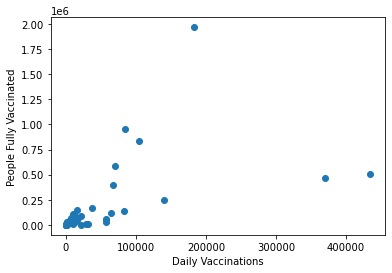

In [17]:
comparison = data.dropna(subset=["daily_vaccinations","people_fully_vaccinated"])
maxDaily= comparison.groupby(["country"])["daily_vaccinations"].max()
maxVaccinated= comparison.groupby(["country"])["people_fully_vaccinated"].max()
maxComparison = pd.concat([maxDaily, maxVaccinated],axis=1)
z = stats.zscore(maxComparison)
absZ = np.abs(z)
maxComparisonfiltered = (absZ < 3).all(axis=1)
newMaxcomparison= maxComparison[maxComparisonfiltered]
plt.scatter(newMaxcomparison["daily_vaccinations"],newMaxcomparison["people_fully_vaccinated"])
plt.ylabel("People Fully Vaccinated")
plt.xlabel("Daily Vaccinations")

Outlier

In [18]:
comparison = data.dropna(subset=["daily_vaccinations","people_fully_vaccinated"])
maxDaily= comparison.groupby(["country"])["daily_vaccinations"].max()
maxVaccinated= comparison.groupby(["country"])["people_fully_vaccinated"].max()
maxComparison = pd.concat([maxDaily, maxVaccinated],axis=1)
z = stats.zscore(maxComparison)
absZ = np.abs(z)
outlierBool = (absZ > 3).all(axis=1)
outlier= maxComparison[outlierBool]
print(outlier)

               daily_vaccinations  people_fully_vaccinated
country                                                   
United States           1355451.0                6926050.0


# Hypothesis Testing

Is the distrubution of vaccine a normal distrubution?

In [27]:
countrytotal= data.groupby(["country"])["total_vaccinations"].max()
stat, p = shapiro(countrytotal)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.314, p=0.000
Probably not Gaussian


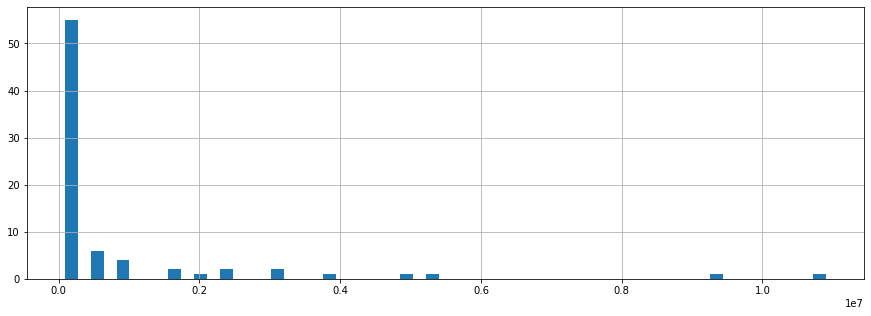

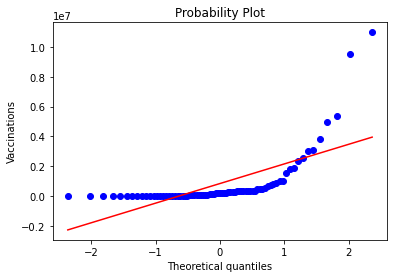

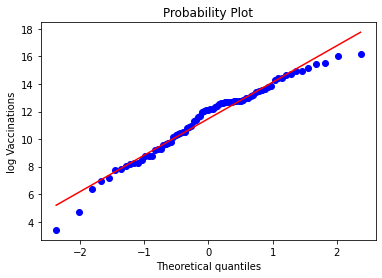

count    7.700000e+01
mean     8.340135e+05
std      1.892491e+06
min      3.000000e+01
25%      1.540700e+04
50%      1.810000e+05
75%      4.917860e+05
max      1.099244e+07
Name: total_vaccinations, dtype: float64

In [64]:
newz = stats.zscore(countrytotal)
newabsZ = np.abs(newz)
countryTotalfiltered = (absZ <3)
newCountrytotal= countrytotal[countryTotalfiltered]
newCountrytotal.hist(bins=30, rwidth=0.5, figsize=(15,5))
plt.show()
stats.probplot(newCountrytotal, plot=plt)
plt.ylabel('Vaccinations')
plt.show()
stats.probplot(np.log(newCountrytotal), plot=plt)
plt.ylabel('log Vaccinations')
plt.show()
newCountrytotal.describe()

Most of the population will not be able to obtain a vaccine. 

Hypothesis 1: Daily vaccination rate in the US is increasing by 100 dose everyday.

Hypothesis 2: Country that uses the Pfizer Vaccine has the highest number of people vaccinated.